# Mini Project 4 

Problem Statement The task is to build a model that will determine the tone (neutral, positive, negative, Can’t tell) of the text. To do this, you will need to train the model on the training data. The resulting model will have to determine the class (neutral, positive, negative, Can’t tell) of test texts (test data that were not used to build the model) with maximum accuracy.

Data Dictionary

ID: tweetID

Tweet: Tweet by user

Sentiment: tone of user

Negative = 0

Neutral = 1

Positive = 2

Can’t tell = 3

Perform Sentiment Analysis using knowledge of NLP.

# Importing Liberaries

In [1]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from nltk.corpus import stopwords
import re

from wordcloud import WordCloud

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


# Importing File

In [3]:
df = pd.read_csv("data.csv")

# EDA Part

In [4]:
df.shape

(7274, 3)

In [5]:
df.size

21822

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   7274 non-null   int64 
 1   tweet      7273 non-null   object
 2   sentiment  7274 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 170.6+ KB


In [7]:
df.describe()

,tweet_id,sentiment
count,7274.000000,7274.000000
mean,4531.736871,1.299148
std,2617.858745,0.607829
min,2.000000,0.000000
25%,2261.500000,1.000000
50%,4530.500000,1.000000
75%,6796.750000,2.000000
max,9092.000000,3.000000


In [8]:
df=df.drop(['tweet_id'], axis=1)

In [9]:
df.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [10]:
df.shape

(7274, 2)

In [11]:
df.size

14548

In [12]:
df.info

<bound method DataFrame.info of                                                   tweet  sentiment
0     #sxswnui #sxsw #apple defining language of tou...          1
1     Learning ab Google doodles! All doodles should...          1
2     one of the most in-your-face ex. of stealing t...          2
3     This iPhone #SXSW app would b pretty awesome i...          0
4     Line outside the Apple store in Austin waiting...          1
...                                                 ...        ...
7269  @mention Google plze Tammi.  I'm in middle of ...          1
7270  RT @mention ÷¼ Are you all set? ÷_ {link} ÷...          1
7271  RT @mention Aha! Found proof of lactation room...          1
7272  We just launched our iPad app at #SXSW! Get al...          1
7273  The next fin serv battle is vs Apple, GOOG, Mo...          1

[7274 rows x 2 columns]>

In [13]:
df.describe

<bound method NDFrame.describe of                                                   tweet  sentiment
0     #sxswnui #sxsw #apple defining language of tou...          1
1     Learning ab Google doodles! All doodles should...          1
2     one of the most in-your-face ex. of stealing t...          2
3     This iPhone #SXSW app would b pretty awesome i...          0
4     Line outside the Apple store in Austin waiting...          1
...                                                 ...        ...
7269  @mention Google plze Tammi.  I'm in middle of ...          1
7270  RT @mention ÷¼ Are you all set? ÷_ {link} ÷...          1
7271  RT @mention Aha! Found proof of lactation room...          1
7272  We just launched our iPad app at #SXSW! Get al...          1
7273  The next fin serv battle is vs Apple, GOOG, Mo...          1

[7274 rows x 2 columns]>

### Null Value Treatment

In [14]:
df.isnull().any()

tweet         True
sentiment    False
dtype: bool

In [15]:
df.isna().sum()

tweet        1
sentiment    0
dtype: int64

### Droping Null Values

In [16]:
df=df.dropna()
df.isna().sum()

tweet        0
sentiment    0
dtype: int64

Finding Corelation Between the Features

In [17]:
df.corr()

,sentiment
sentiment,1.0


Checking out the Positive comments from Data

In [18]:
df[df['sentiment'] == 2].head()

,tweet,sentiment
2,one of the most in-your-face ex. of stealing t...,2
8,Free #SXSW sampler on iTunes {link} #FreeMusic,2
9,I think I might go all weekend without seeing ...,2
11,It's official! I'm buying an iPad. #SXSW #elevate,2
12,"They're giving away iPad 2's, x boxes and book...",2


Checking out the Negetive comments from Data

In [19]:
df[df['sentiment'] == 0].head()

,tweet,sentiment
3,This iPhone #SXSW app would b pretty awesome i...,0
24,.@mention I have a 3G iPhone. After 3 hrs twee...,0
34,So I went the whole day w/out my laptop &amp; ...,0
50,RT @mention 'Google lost its way by caring too...,0
63,I composed a tweet so acerbic and cynical abou...,0


Checking out the Neutral Comments from Data

In [20]:
df[df['sentiment'] == 1].head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
4,Line outside the Apple store in Austin waiting...,1
5,#technews One lone dude awaits iPad 2 at Apple...,1
6,"SXSW Tips, Prince, NPR Videos, Toy Shopping Wi...",1


Checking out the Cant Tell Comments from Data

In [21]:
df[df['sentiment'] == 3].head()

,tweet,sentiment
10,RT @mention Official #SXSW App Û÷SXSW GOÛª b...,3
28,standing on a long line surrounded by unemploy...,3
123,Google/Bing search smackdown panel is in a gia...,3
133,Original products for 1 device is nuts. #sxsw....,3
242,iPhone crashed in front of #sxsw Apple pop-up....,3


Value Count of Total Comment Type

In [22]:
df["sentiment"].value_counts()

1    4310
2    2382
0     456
3     125
Name: sentiment, dtype: int64

## Graphical Representation

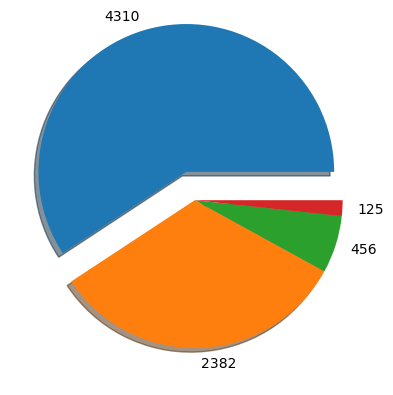

In [23]:
y=df["sentiment"].value_counts()
#mylables=[" Neutral", "Positive", "Negative","  Cant tell"]
mylables=df["sentiment"].value_counts()
myexplode=[0.2,0,0,0]
myexplode = [0.2,0,0,0]
plt.pie(y,labels=mylables,explode = myexplode, shadow = True )
plt.show()

In [24]:
df = df.dropna(subset=['tweet'])

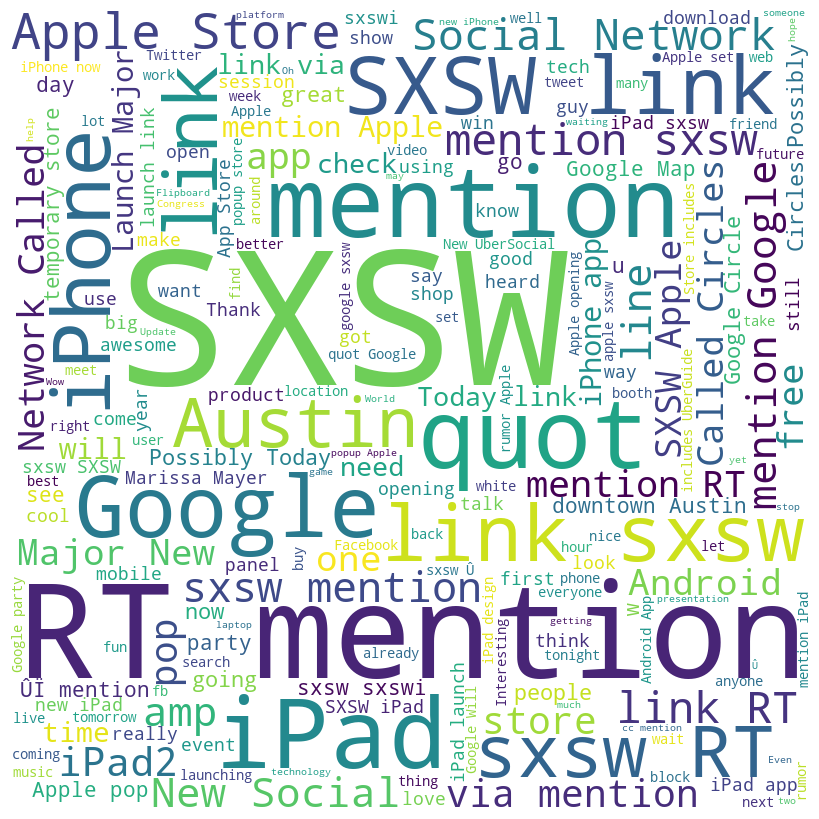

In [25]:
text = ' '.join(df['tweet'])
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# Lemmatization  

In [26]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

In [27]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [28]:
df['tweet_lemmatized'] = df['tweet'].apply(lemmatize_text)

In [29]:
print(df[['tweet', 'tweet_lemmatized']].head())

                                               tweet  \
0  #sxswnui #sxsw #apple defining language of tou...   
1  Learning ab Google doodles! All doodles should...   
2  one of the most in-your-face ex. of stealing t...   
3  This iPhone #SXSW app would b pretty awesome i...   
4  Line outside the Apple store in Austin waiting...   

                                    tweet_lemmatized  
0  # sxswnui # sxsw # apple defining language of ...  
1  Learning ab Google doodle ! All doodle should ...  
2  one of the most in-your-face ex . of stealing ...  
3  This iPhone # SXSW app would b pretty awesome ...  
4  Line outside the Apple store in Austin waiting...  


Removing Punctuations 

In [30]:
df['tweet_lemmatized'].replace('[^a-zA-Z]', " ", regex=True, inplace=True)
df.head()

,tweet,sentiment,tweet_lemmatized
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...


Remove meaningless words from tweet column

In [31]:
# remove meaningless words from tweet column

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = re.findall('\w+', text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

Stop Words Download

In [32]:
nltk.download('stopwords')
df['tweet_clean'] = df['tweet'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
print(df[['tweet_lemmatized', 'tweet_clean']].head())

                                    tweet_lemmatized  \
0    sxswnui   sxsw   apple defining language of ...   
1  Learning ab Google doodle   All doodle should ...   
2  one of the most in your face ex   of stealing ...   
3  This iPhone   SXSW app would b pretty awesome ...   
4  Line outside the Apple store in Austin waiting...   

                                         tweet_clean  
0  sxswnui sxsw apple defining language touch dif...  
1  Learning ab Google doodles doodles light funny...  
2  one face ex stealing show yrs RT mention quot ...  
3  iPhone SXSW app would b pretty awesome crash e...  
4  Line outside Apple store Austin waiting new iP...  


AS YOU CAN SEE TWEET CLEAN IS MORE ACURATE CLEANED DATA OF TWEET

In [34]:
df.head()

,tweet,sentiment,tweet_lemmatized,tweet_clean
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...,sxswnui sxsw apple defining language touch dif...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...,Learning ab Google doodles doodles light funny...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...,one face ex stealing show yrs RT mention quot ...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...,iPhone SXSW app would b pretty awesome crash e...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,Line outside Apple store Austin waiting new iP...


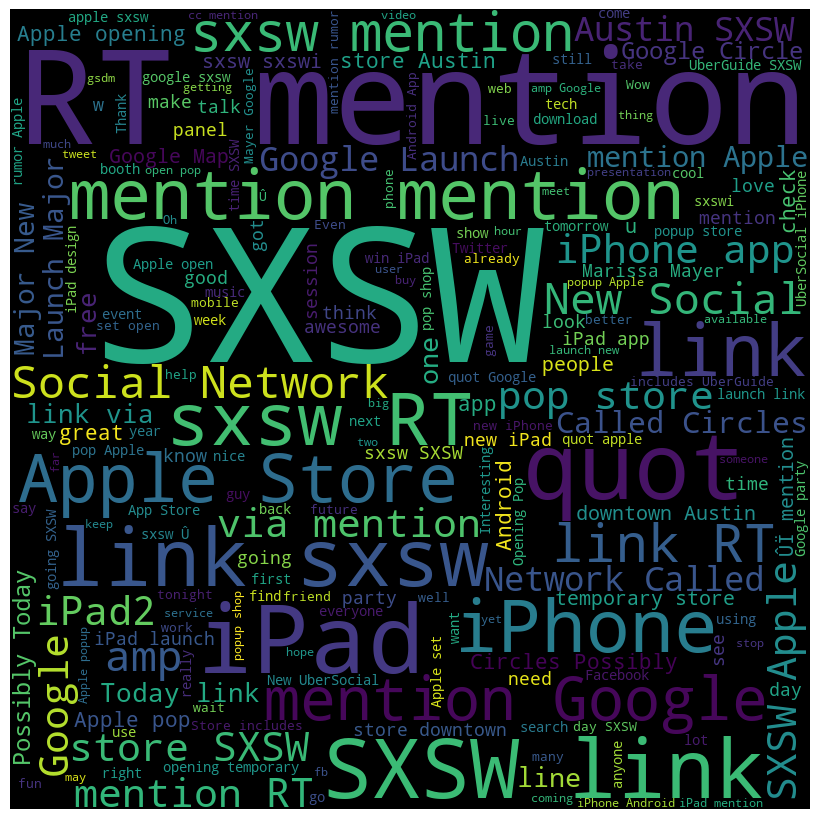

In [35]:
text = ' '.join(df['tweet_clean'])

wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Lets delete most frequent words form tweet_clean

In [36]:
from collections import Counter

text = ' '.join(df['tweet_clean'].astype(str))
tokens = text.split()

token_counts = Counter(tokens)

n = 5  # number of most frequent words to delete
most_common_tokens = [token for token, count in token_counts.most_common(n)]

for word in most_common_tokens:
    df['tweet_remove'] = df['tweet_clean'].str.replace(word, '')



In [37]:
df["tweet_clean"][10]

'RT mention Official SXSW App Û SXSW GO Ûª bit ly hmiiGa android iphone ipad'

In [38]:
df['tweet_remove'][10]

' mention Official SXSW App Û SXSW GO Ûª bit ly hmiiGa android iphone ipad'

In [39]:
df.head()

,tweet,sentiment,tweet_lemmatized,tweet_clean,tweet_remove
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...,sxswnui sxsw apple defining language touch dif...,sxswnui sxsw apple defining language touch dif...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...,Learning ab Google doodles doodles light funny...,Learning ab Google doodles doodles light funny...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...,one face ex stealing show yrs RT mention quot ...,one face ex stealing show yrs mention quot SX...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...,iPhone SXSW app would b pretty awesome crash e...,iPhone SXSW app would b pretty awesome crash e...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,Line outside Apple store Austin waiting new iP...,Line outside Apple store Austin waiting new iP...


Here in this 'sxsw', 'sxswnui', 'rt', 'link', 'ipad', 'mention' these are most commonly repetative words Lets Treat them

In [40]:
words = ['sxsw',"SXSW" ,'sxswnui', 'rt', 'link', 'ipad', 'mention'] # list of words to remove

# use .str.replace() to remove the common words
for word in words:
    df['tweet_remove'] = df['tweet_remove'].str.replace(word, '')

# remove extra spaces that may have been created due to removing the words
df['tweet_remove'] = df['tweet_remove'].str.strip()

In [41]:
df["tweet_remove"]

0       nui  apple defining language touch different d...
1       Learning ab Google doodles doodles light funny...
2       one face ex stealing show yrs   quot  Apple sc...
3       iPhone  app would b pretty awesome crash every...
4        Line outside Apple store Austin waiting new iPad
                              ...                        
7269    Google plze Tammi middle  craziness everything...
7270            ¼ set _  _ edchat musedchat  i newTwitter
7271    Aha Found proof lactation room excuse quot Mot...
7272    launched iPad app  Get details first edition FREE
7273    next fin serv battle vs Apple GOOG Mobile oper...
Name: tweet_remove, Length: 7273, dtype: object

In [42]:
df.head()

,tweet,sentiment,tweet_lemmatized,tweet_clean,tweet_remove
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language of ...,sxswnui sxsw apple defining language touch dif...,nui apple defining language touch different d...
1,Learning ab Google doodles! All doodles should...,1,Learning ab Google doodle All doodle should ...,Learning ab Google doodles doodles light funny...,Learning ab Google doodles doodles light funny...
2,one of the most in-your-face ex. of stealing t...,2,one of the most in your face ex of stealing ...,one face ex stealing show yrs RT mention quot ...,one face ex stealing show yrs quot Apple sc...
3,This iPhone #SXSW app would b pretty awesome i...,0,This iPhone SXSW app would b pretty awesome ...,iPhone SXSW app would b pretty awesome crash e...,iPhone app would b pretty awesome crash every...
4,Line outside the Apple store in Austin waiting...,1,Line outside the Apple store in Austin waiting...,Line outside Apple store Austin waiting new iP...,Line outside Apple store Austin waiting new iPad


In [43]:
df=df.drop(['tweet','tweet_lemmatized', 'tweet_clean'], axis=1)

In [44]:
df.head()

,sentiment,tweet_remove
0,1,nui apple defining language touch different d...
1,1,Learning ab Google doodles doodles light funny...
2,2,one face ex stealing show yrs quot Apple sc...
3,0,iPhone app would b pretty awesome crash every...
4,1,Line outside Apple store Austin waiting new iPad


In [45]:
df = df.rename(columns={'tweet_remove': 'tweet'})

In [46]:
df.head()

,sentiment,tweet
0,1,nui apple defining language touch different d...
1,1,Learning ab Google doodles doodles light funny...
2,2,one face ex stealing show yrs quot Apple sc...
3,0,iPhone app would b pretty awesome crash every...
4,1,Line outside Apple store Austin waiting new iPad


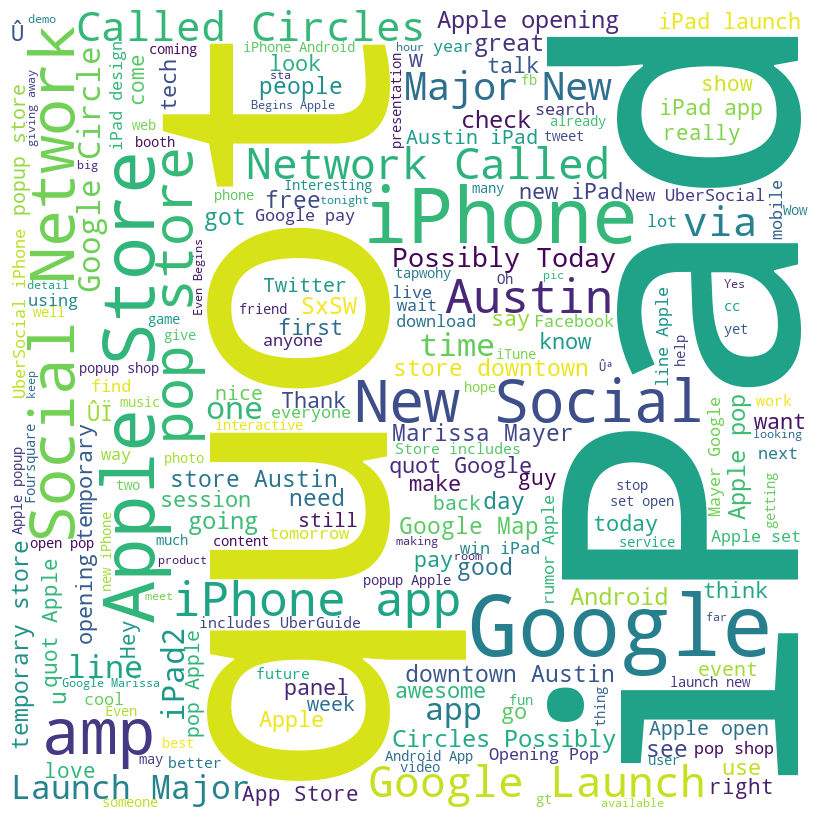

In [47]:
text = ' '.join(df['tweet'])

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text)

plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

Lets Tokenize the Tweet Text

In [48]:
# Tokenize the text
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['tweet'])


Convert Text into sequence

In [49]:
# Convert text to sequences
sequences = tokenizer.texts_to_sequences(df['tweet'])

Pad the Sequence To Fix Length

In [50]:
# Pad sequences to a fixed length
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')


Distinguish data into training and testing sets

In [51]:
from sklearn.model_selection import train_test_split
X = padded_sequences
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lets Create LSTM model

In [52]:
model = keras.Sequential([
    keras.layers.Embedding(5000, 32, input_length=50),
    keras.layers.LSTM(64),
    keras.layers.Dense(1, activation='sigmoid')
])


In [53]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Step 4: Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/10
182/182 [==============================] - 17s 50ms/step - loss: -3.8144 - accuracy: 0.5925 - val_loss: -6.5021 - val_accuracy: 0.5835
Epoch 2/10
182/182 [==============================] - 8s 42ms/step - loss: -7.9522 - accuracy: 0.5949 - val_loss: -10.1598 - val_accuracy: 0.5835
Epoch 3/10
182/182 [==============================] - 8s 42ms/step - loss: -11.3222 - accuracy: 0.5949 - val_loss: -13.6680 - val_accuracy: 0.5835
Epoch 4/10
182/182 [==============================] - 7s 41ms/step - loss: -14.6142 - accuracy: 0.5949 - val_loss: -17.0813 - val_accuracy: 0.5835
Epoch 5/10
182/182 [==============================] - 7s 40ms/step - loss: -17.8737 - accuracy: 0.5949 - val_loss: -20.5141 - val_accuracy: 0.5835
Epoch 6/10
182/182 [==============================] - 8s 42ms/step - loss: -21.1074 - accuracy: 0.5949 - val_loss: -23.8960 - val_accuracy: 0.5835
Epoch 7/10
182/182 [==============================] - 10s 53ms/step - loss: -24.3351 - accuracy: 0.5949 - val_loss: -27.

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split


# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['tweet'], df['sentiment'], test_size=0.2, random_state=42)

# create a CountVectorizer object to transform the text data into numerical features
vectorizer = CountVectorizer(stop_words='english')
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# train the Naive Bayes model on the training data
nb = MultinomialNB()
nb.fit(X_train, y_train)

# make predictions on the test data
y_pred = nb.predict(X_test)

# evaluate the model's accuracy and performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Classification report: \n{report}")


Accuracy: 0.6563573883161512
Classification report: 
              precision    recall  f1-score   support

           0       0.41      0.10      0.16        88
           1       0.69      0.83      0.75       849
           2       0.59      0.49      0.54       495
           3       0.00      0.00      0.00        23

    accuracy                           0.66      1455
   macro avg       0.42      0.36      0.36      1455
weighted avg       0.63      0.66      0.63      1455



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
